# ARTIFICIAL NEURAL NETWORKS

In [1]:
# Install TensorFlow
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [24]:
!pip install -U keras-tuner

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/snehuuu28/Excelr_Data_Science/main/Assignments/Assignment_18/Alphabets_data.csv')

# Data Exploration and Preprocessing

In [6]:
print("Dataset Head:")
print(df.head())

Dataset Head:
  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  


In [7]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [9]:
print("\nDataset Description:")
print(df.describe())


Dataset Description:
               xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354     

In [10]:
print(f"\nShape of Dataset: {df.shape}")


Shape of Dataset: (20000, 17)


In [11]:
print("\nClass Distribution:")
print(df['letter'].value_counts())


Class Distribution:
letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


In [12]:
# Encode target variable
encoder = LabelEncoder()
df['letter'] = encoder.fit_transform(df['letter'])

In [13]:
# Split features and target
X = df.drop('letter', axis=1)
y = to_categorical(df['letter'])

In [14]:
# Normalize feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Implementation

In [16]:
# Construct the basic ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])


In [17]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32,
                    verbose=2)

Epoch 1/20
500/500 - 5s - 10ms/step - accuracy: 0.3658 - loss: 2.1404 - val_accuracy: 0.6585 - val_loss: 1.2292
Epoch 2/20
500/500 - 1s - 3ms/step - accuracy: 0.5883 - loss: 1.3118 - val_accuracy: 0.7333 - val_loss: 0.9400
Epoch 3/20
500/500 - 1s - 3ms/step - accuracy: 0.6635 - loss: 1.0858 - val_accuracy: 0.7805 - val_loss: 0.7838
Epoch 4/20
500/500 - 2s - 3ms/step - accuracy: 0.7021 - loss: 0.9465 - val_accuracy: 0.8095 - val_loss: 0.6852
Epoch 5/20
500/500 - 1s - 3ms/step - accuracy: 0.7323 - loss: 0.8627 - val_accuracy: 0.8245 - val_loss: 0.6183
Epoch 6/20
500/500 - 1s - 3ms/step - accuracy: 0.7541 - loss: 0.7972 - val_accuracy: 0.8385 - val_loss: 0.5741
Epoch 7/20
500/500 - 1s - 3ms/step - accuracy: 0.7671 - loss: 0.7485 - val_accuracy: 0.8508 - val_loss: 0.5277
Epoch 8/20
500/500 - 1s - 3ms/step - accuracy: 0.7784 - loss: 0.7113 - val_accuracy: 0.8610 - val_loss: 0.4951
Epoch 9/20
500/500 - 2s - 3ms/step - accuracy: 0.7889 - loss: 0.6728 - val_accuracy: 0.8662 - val_loss: 0.4696


In [19]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy (Default Model): {test_accuracy:.2f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9102 - loss: 0.3275

Test Accuracy (Default Model): 0.90


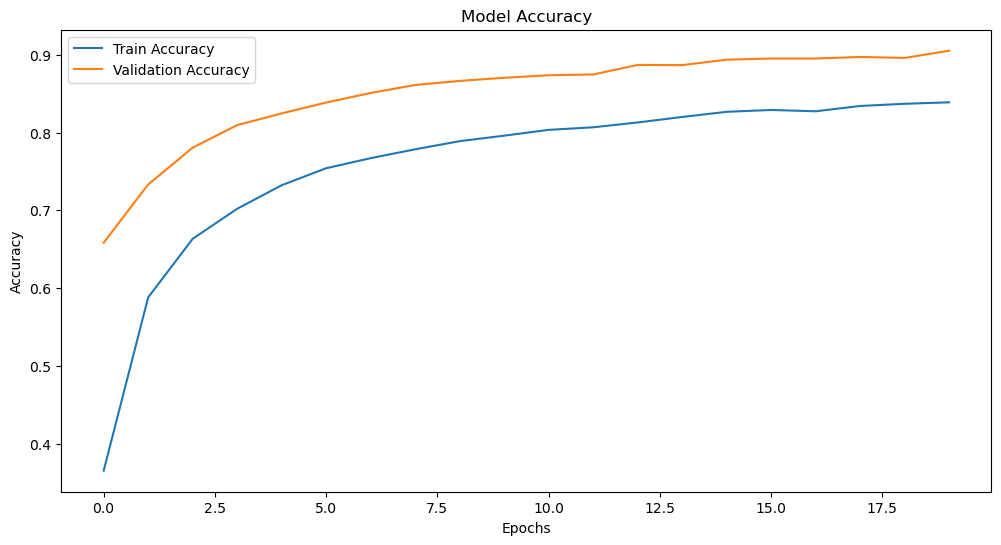

In [20]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [21]:
# Predictions and metrics
predictions = model.predict(X_test)
predictions_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
print("\nClassification Report (Default Model):")
print(classification_report(true_classes, predictions_classes))

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report (Default Model):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       149
           1       0.88      0.92      0.89       153
           2       0.97      0.83      0.90       137
           3       0.87      0.93      0.90       156
           4       0.92      0.94      0.93       141
           5       0.83      0.90      0.87       140
           6       0.84      0.90      0.87       160
           7       0.89      0.72      0.80       144
           8       0.96      0.90      0.93       146
           9       0.95      0.90      0.92       149
          10       0.83      0.84      0.83       130
          11       0.93      0.89      0.91       155
          12       0.95      0.95      0.95       168
          13       0.93      0.90      0.91       151
          14       0.86      0.88      0.87       145
          15       0.96      0.88      0.92       173


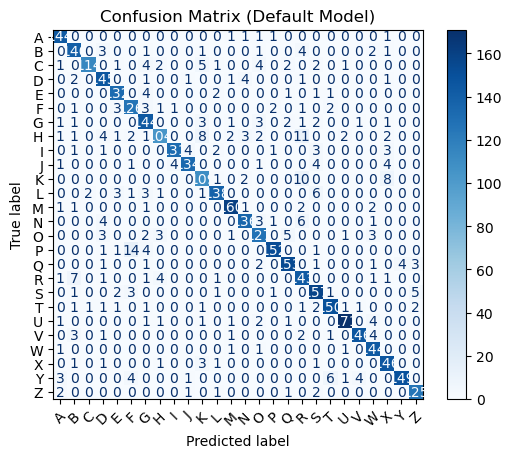

In [22]:
# Confusion Matrix
cm = confusion_matrix(true_classes, predictions_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix (Default Model)')
plt.show()

In [28]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [30]:
# Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32),
                    activation=hp.Choice('activation', values=['relu', 'tanh']),
                    input_shape=(X_train.shape[1],)))
    
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Hyperparameter Tuning

In [32]:
# Initialize the tuner with RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Metric to optimize
    max_trials=10,              # Number of trials
    executions_per_trial=2,     # Number of executions per trial
    directory='my_dir',         # Directory to store the tuner results
    project_name='alphabet_classification'
)

In [34]:
# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Trial 10 Complete [00h 00m 50s]
val_accuracy: 0.9471250176429749

Best val_accuracy So Far: 0.9492500126361847
Total elapsed time: 00h 08m 33s


In [36]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of units in the first hidden layer is {best_hps.get('units')},
the best activation function is {best_hps.get('activation')},
and the best learning rate is {best_hps.get('learning_rate')}.
""")


The optimal number of units in the first hidden layer is 224,
the best activation function is tanh,
and the best learning rate is 0.01.



In [38]:
# Build the best model with the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

In [40]:
# Train the best model
history = best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6417 - loss: 1.2651 - val_accuracy: 0.7925 - val_loss: 0.7068
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8144 - loss: 0.6228 - val_accuracy: 0.8545 - val_loss: 0.4921
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8728 - loss: 0.4068 - val_accuracy: 0.8917 - val_loss: 0.3716
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9082 - loss: 0.2888 - val_accuracy: 0.9143 - val_loss: 0.2677
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9238 - loss: 0.2324 - val_accuracy: 0.9155 - val_loss: 0.2442
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9344 - loss: 0.2024 - val_accuracy: 0.9208 - val_loss: 0.2461
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9417 - loss: 0.1851 - val_accuracy: 0.9185 - val_loss: 0.2808
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9412 - loss: 0.1701 - val_accuracy: 0.

# Evaluation

In [42]:
# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy of the best model: {test_accuracy}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9378 - loss: 0.2585
Test Accuracy of the best model: 0.9422500133514404


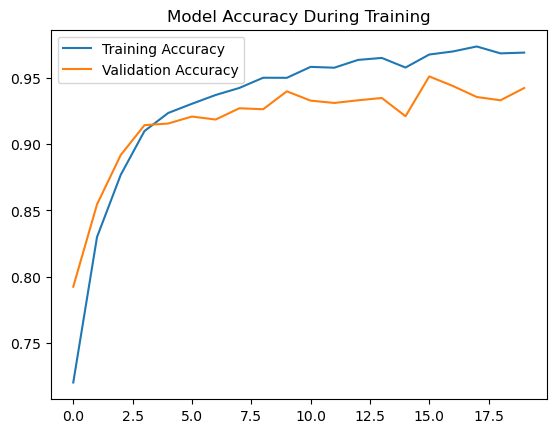

In [44]:
# Plot the training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy During Training")
plt.show()

In [46]:
from sklearn.metrics import classification_report
predictions = best_model.predict(X_test)
predictions_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
print(classification_report(true_classes, predictions_classes))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       149
           1       0.86      0.98      0.92       153
           2       0.98      0.88      0.93       137
           3       0.95      0.95      0.95       156
           4       0.94      0.95      0.95       141
           5       0.86      0.98      0.92       140
           6       0.93      0.96      0.94       160
           7       0.85      0.90      0.87       144
           8       0.97      0.94      0.95       146
           9       0.95      0.96      0.96       149
          10       0.95      0.89      0.92       130
          11       0.97      0.95      0.96       155
          12       0.98      0.97      0.98       168
          13       0.97      0.97      0.97       151
          14       0.90      0.95      0.92       145
          15       0.98      0.95      0.96       173
          16       0.99      0.90      0

1) Precision: This metric measures the accuracy of the positive predictions. For instance, class 0 has a precision of 0.97, which means that 97% of the instances classified as class 0 are indeed class 0. Classes like 25 have a precision of 0.75, indicating more false positives.

2) Recall: This measures the model's ability to identify all the positive instances of a class. For example, class 18 has a recall of 0.81, meaning 81% of the actual class 18 instances are correctly identified. On the other hand, classes like 1 and 2 have recall values above 0.90, showing that they are identified with high accuracy.

3) F1-Score: The harmonic mean of precision and recall. Class 0, with an F1-score of 0.99, demonstrates that it is a well-balanced class. However, class 25, with an F1-score of 0.85, could indicate a lower balance between precision and recall for that class.

4) Support: This represents the number of actual occurrences of each class in the dataset. For instance, class 0 has 149 instances, and class 25 has 132 instances. The class distribution is not completely balanced, but most classes have a substantial number of samples.

# Evaluation

* High performance: The model achieves high accuracy (94%), with most classes having excellent precision and recall.